In [3]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import focus_stack as stk

EXTENSIONS = set(["bmp", "jpeg", "jpg", "png", "tif", "tiff"])

src_dir = "ImageSt_polen"
src_contents = os.walk(src_dir)
dirpath, _, fnames = next(src_contents)

image_dir = os.path.split(dirpath)[-1]

print("Processing '" + image_dir + "' folder...")

image_files = sorted([os.path.join(dirpath, name) for name in fnames])
image_files = [cv2.imread(name) for name in image_files
          if os.path.splitext(name)[-1][1:].lower() in EXTENSIONS]

if any([image is None for image in image_files]):
    raise RuntimeError("One or more input files failed to load.")
print(image_dir + " folder is ready")

Processing 'ImageSt_polen' folder...
ImageSt_polen folder is ready


Comparamnos con una de las imágenes de partida:

Image 0


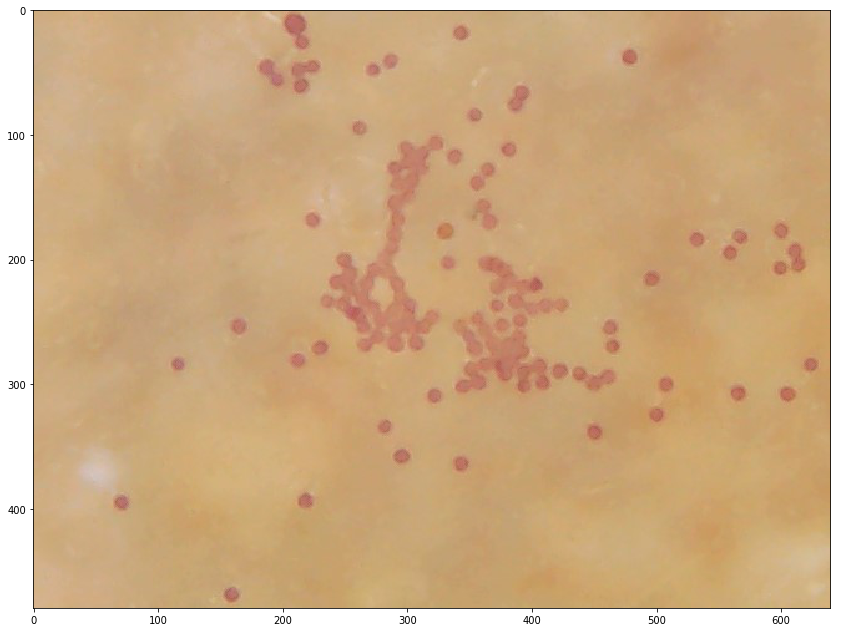

In [4]:
plt.figure(figsize=(16,11))
print('Image 0')
plt.imshow(cv2.cvtColor(image_files[0], cv2.COLOR_BGR2RGB))
plt.show()

Realizando apilamiento de imágenes
Apilamiento de imágenes realizado


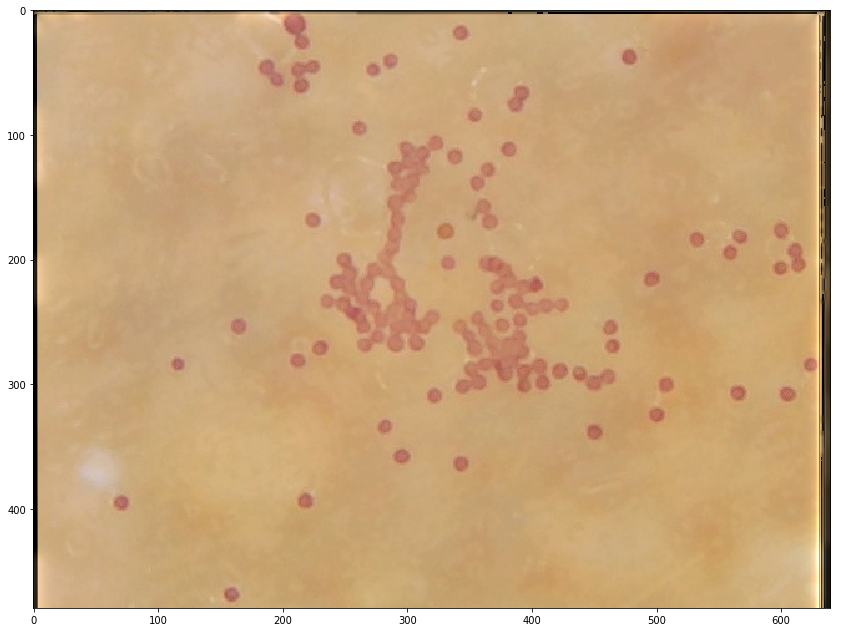

In [5]:
print("Realizando apilamiento de imágenes")
stacked = stk.stack_focus(
    image_files,
    choice=stk.CHOICE_PYRAMID,
    energy=stk.ENERGY_LAPLACIAN,
    pyramid_min_size=32,
    kernel_size=5,
    blur_size=5,
    smooth_size=32)
print("Apilamiento de imágenes realizado")
plt.figure(figsize=(16,11))
plt.imshow(cv2.cvtColor(stacked, cv2.COLOR_BGR2RGB))
plt.show()